# Discovery the predominant wind direction

## Objective
Observing the predominant wind direction in the city of Rancho Queimado, Santa Catarina, Brazil.

Use the data from the meteorological station of the National Institute of Meteorology (INMET) of the city of Rancho Queimado, Santa Catarina, Brazil. From 2016 to 2023-04.

## Methodology
The predominant wind direction is the direction that the wind blows most of the time. The wind direction is measured in degrees, clockwise from north. For example, a northerly wind blows from the north to the south.

Considering the wind direction in degrees, the predominant wind direction is the direction that has the highest frequency in the data set.

### Importing the libraries

In [39]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

### Auxliary functions


In [40]:
def read_csv_file(file_name):
    """
    Read csv file and return a pandas dataframe

    file_name: csv file name
    """
    df = pd.read_csv(file_name, sep=';', decimal=',', parse_dates=[['Data', 'Hora (UTC)']])
    df = df.rename(columns={'Data_Hora (UTC)': 'Data_Hora'})
    df = df.set_index('Data_Hora')
    return df


def plot_windrose(df, field='PWGSA'):
    """
    Plot a wind rose

    df: pandas dataframe
    field: field to plot
    """
    ax = WindroseAxes.from_ax()
    ax.bar(df['Dir. Vento (m/s)'], df[field], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()

    # add a title
    plt.title('Wind Rose')

def plot_pwgsa(df, minimal_threshold=20):
    """
    Plot a wind rose

    df: pandas dataframe
    minimal_threshold: minimal threshold to plot
    """
    df_plot = df[df['PWGSA (km/h)'] >= minimal_threshold]
    plot_windrose(df_plot, 'PWGSA (km/h)')

### Reading the data

The data source is an automatic weather station from INMET (National Institute of Meteorology) located in the city of Rancho Queimado, Brazil. (INMET - A870)

Source: https://mapas.inmet.gov.br/

In [41]:
file_names = ['2016_since_03_06.csv',
              '2017.csv',
              '2018.csv',
              '2019.csv',
              '2020.csv',
              '2021.csv',
              '2022.csv',
              '2023_uni_05_05.csv']

df = pd.concat([read_csv_file(file_name) for file_name in file_names], ignore_index=True)

### Predominant wind direction in Rancho Queimado

The predominant wind direction is the direction that the wind blows most of the time.

<Axes: xlabel='Dir. Vento (m/s)'>

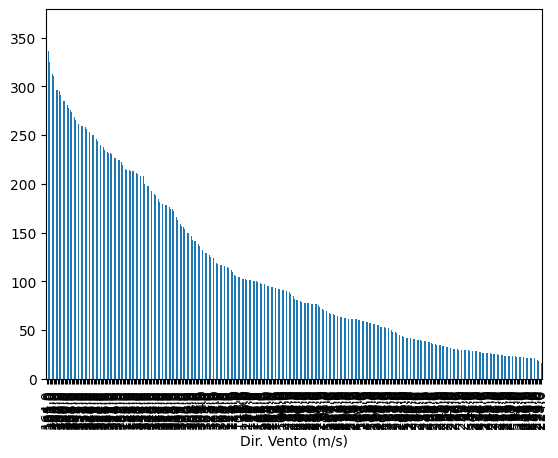

In [42]:
df['Dir. Vento (m/s)'].value_counts().plot(kind='bar')

### Create a new column with the cardinal direction

<Axes: xlabel='Predominant Wind Direction (m/s)'>

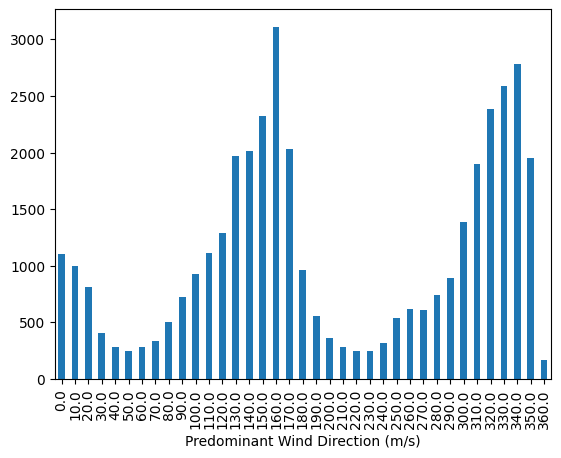

In [43]:
df["Predominant Wind Direction (m/s)"] = df["Dir. Vento (m/s)"].apply(lambda x: int(x/10)*10 if not pd.isna(x) else x)
df['Predominant Wind Direction (m/s)'].value_counts().sort_index().plot(kind='bar')

### Plot the predominant wind direction in a rose diagram
This plot show the predominant wind direction iin high speed winds for short periods of time.

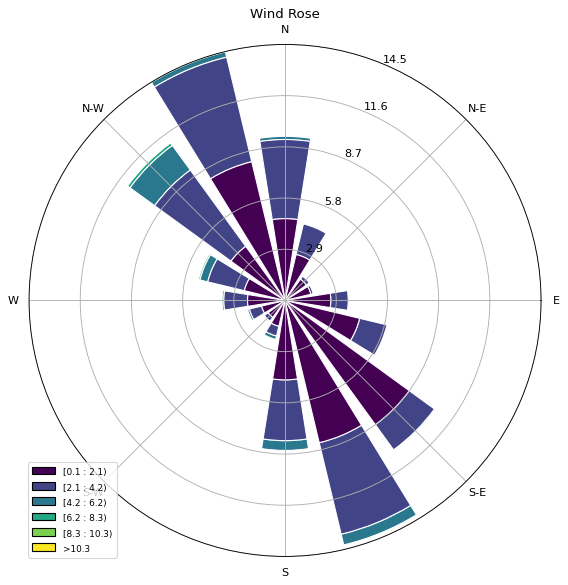

In [44]:
plot_windrose(df, 'Vel. Vento (m/s)')

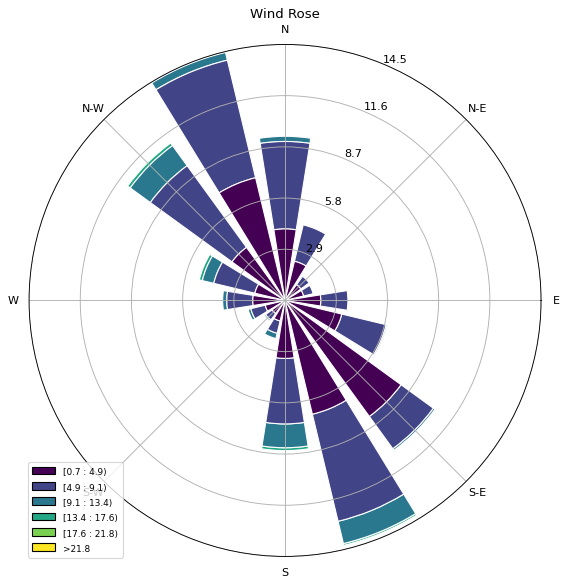

In [45]:
plot_windrose(df, 'Raj. Vento (m/s)')

### Predominant wind gust speed adjusted
Create a new column with the predominant wind gust speed in km/h with a 10 km/h resolution.
Minimal speed threshold: 20 km/h

The most dangerous winds are the gusts, because they can cause damage to structures and vegetation.
Rancho Queimado is in high altitude, so the wind gusts are more intense.

Is important to know the predominant wind gust speed to take the necessary precautions. 

In [46]:
df["PWGSA (km/h)"] = df["Raj. Vento (m/s)"].apply(lambda x: int(x*3.6/10)*10 if not pd.isna(x) else x)

Plot the predominant wind gust speed in a rose diagram limited to above 30 km/h

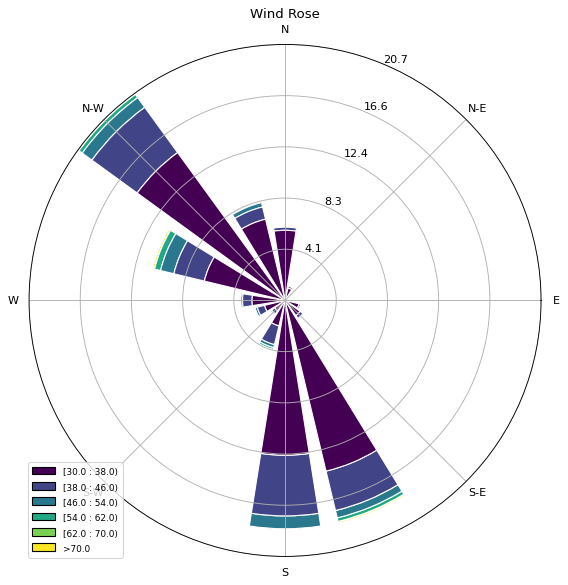

In [51]:
plot_pwgsa(df, 30)

Plot the predominant wind gust speed in a rose diagram limited to above 60 km/h

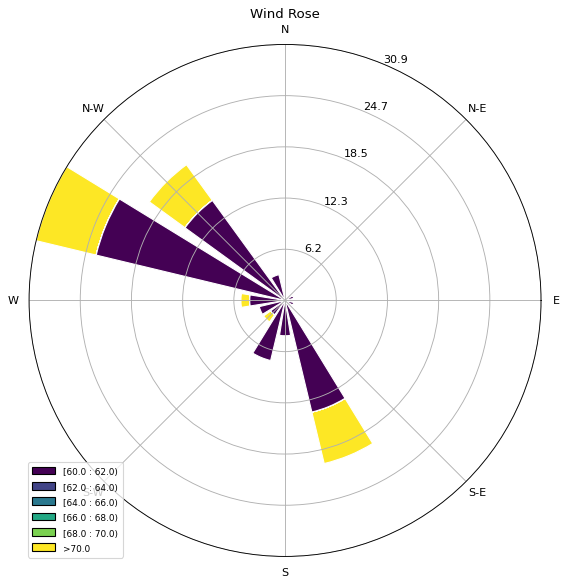

In [52]:
plot_pwgsa(df, 60)

## Conclusion

The predominant wind direction in Rancho Queimado is the approximately the South/Southeast direction, and the North/Northeast direction is the second predominant wind direction.

## Data and Code
https://github.com/ranchoqueimado/weather_data